In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#Import Women Means Data
Women_df = pd.read_csv('Women_Means_Dataset.csv')
Women_df

,Gender,Formal_Education,Years_Coding,Salary,Age
0,1,0.900000,3.600000,84749.500000,19.5
1,1,1.340426,4.276596,72265.457447,23.0
2,1,2.231527,6.162562,102780.293103,27.0
3,1,2.018182,7.981818,103727.909091,32.0
4,1,2.196721,9.893443,124011.819672,37.0
5,1,1.871560,11.605505,108215.096330,42.0
6,1,2.314286,13.371429,125678.071429,47.0
7,1,2.481481,11.722222,110471.722222,52.0
8,1,1.769231,12.384615,147018.730769,57.0
9,1,2.125000,15.083333,129791.208333,64.5


In [4]:
#Import Men Means Data
Men_df = pd.read_csv('Men_Means_Dataset.csv')
Men_df

,Gender,Formal_Education,Years_Coding,Salary,Age
0,0,2.250000,6.687500,63569.828125,19.5
1,0,1.468085,3.961702,81898.436170,23.0
2,0,1.894661,5.763348,101665.448052,27.0
3,0,2.011208,8.782067,130376.534247,32.0
4,0,2.024390,11.356098,139484.879675,37.0
5,0,2.257683,12.756501,154881.319149,42.0
6,0,2.071429,13.398810,155624.520833,47.0
7,0,2.079470,13.523179,149678.322848,52.0
8,0,1.973568,15.374449,158121.781938,57.0
9,0,2.075949,15.004219,147873.997890,64.5


In [5]:
Women_X = Women_df[['Age','Years_Coding','Formal_Education']]
Women_X

,Age,Years_Coding,Formal_Education
0,19.5,3.600000,0.900000
1,23.0,4.276596,1.340426
2,27.0,6.162562,2.231527
3,32.0,7.981818,2.018182
4,37.0,9.893443,2.196721
5,42.0,11.605505,1.871560
6,47.0,13.371429,2.314286
7,52.0,11.722222,2.481481
8,57.0,12.384615,1.769231
9,64.5,15.083333,2.125000


In [6]:
Men_X = Men_df[['Age', 'Years_Coding','Formal_Education']]
Men_X

,Age,Years_Coding,Formal_Education
0,19.5,6.687500,2.250000
1,23.0,3.961702,1.468085
2,27.0,5.763348,1.894661
3,32.0,8.782067,2.011208
4,37.0,11.356098,2.024390
5,42.0,12.756501,2.257683
6,47.0,13.398810,2.071429
7,52.0,13.523179,2.079470
8,57.0,15.374449,1.973568
9,64.5,15.004219,2.075949


In [7]:
Women_Y = Women_df['Salary']
Men_Y = Men_df['Salary']

In [8]:
from sklearn.model_selection import train_test_split
Women_X_train, Women_X_test, Women_y_train, Women_y_test = train_test_split(Women_X, Women_Y, test_size=0.25, random_state=101)
print(Women_X_train.shape)
print(Women_X_test.shape)
print(Women_y_train.shape)
print(Women_y_test.shape)

(7, 3)
(3, 3)
(7,)
(3,)


In [9]:
from sklearn.model_selection import train_test_split
Men_X_train, Men_X_test, Men_y_train, Men_y_test = train_test_split(Men_X, Men_Y, test_size=0.25, random_state=101)
print(Men_X_train.shape)
print(Men_X_test.shape)
print(Men_y_train.shape)
print(Men_y_test.shape)

(7, 3)
(3, 3)
(7,)
(3,)


In [10]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Women_model.fit(Women_X_train,Women_y_train)

LinearRegression()

In [11]:
from sklearn.linear_model import LinearRegression
Men_model = LinearRegression()
Men_model.fit(Men_X_train,Men_y_train)

LinearRegression()

In [12]:
# print the intercept
print(Men_model.intercept_)

24914.386604816726


In [13]:
print(Women_model.intercept_)

41478.04947619648


In [14]:
print(Women_model.coef_)

[ -747.16501973  6238.01977099 17068.47674283]


In [15]:
print(Men_model.coef_)

[ -800.86951961  7308.19059767 32021.09182509]


In [16]:
Women_predictions = Women_model.predict(Women_X_test)
Women_predictions

array([106343.19321416,  97835.54319473,  64726.83183555])

In [17]:
Men_predictions = Men_model.predict(Men_X_test)
Men_predictions

array([154820.04127142, 106079.66399598, 130218.41220086])

<AxesSubplot:xlabel='Salary'>

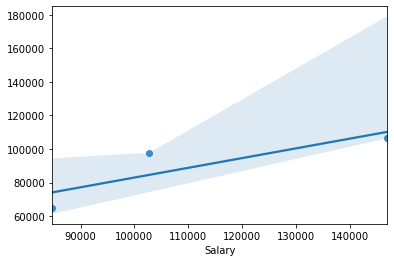

In [18]:
sns.regplot(Women_y_test,Women_predictions)

<AxesSubplot:xlabel='Salary'>

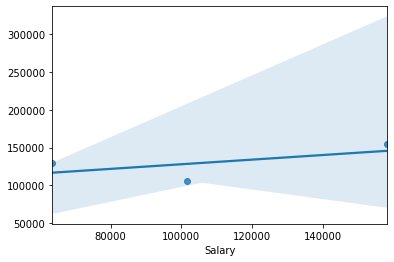

In [19]:
sns.regplot(Men_y_test,Men_predictions)

In [20]:
import statsmodels.api as sm
Woemn_X_train_Sm= sm.add_constant(Women_X_train)
Women_X_train_Sm= sm.add_constant(Women_X_train)
ls=sm.OLS(Women_y_train,Women_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     7.382
Date:                Tue, 27 Jul 2021   Prob (F-statistic):             0.0674
Time:                        17:42:32   Log-Likelihood:                -71.124
No. Observations:                   7   AIC:                             150.2
Df Residuals:                       3   BIC:                             150.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.148e+04   2.35e+04  

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [21]:
import statsmodels.api as sm
Men_X_train_Sm= sm.add_constant(Men_X_train)
Men_X_train_Sm= sm.add_constant(Men_X_train)
ls=sm.OLS(Men_y_train,Men_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     91.86
Date:                Tue, 27 Jul 2021   Prob (F-statistic):            0.00189
Time:                        17:42:32   Log-Likelihood:                -64.674
No. Observations:                   7   AIC:                             137.3
Df Residuals:                       3   BIC:                             137.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.491e+04   2.92e+04  

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [22]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# X = df[['Interest_Rate','Unemployment_Rate']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price'].astype(float) # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Women_X, Women_Y)

print(regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# Age label and input box
label1 = tk.Label(root, text=' Age: ')
canvas1.create_window(100, 80, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 80, window=entry1)

# Formal Education label and input box
label2 = tk.Label(root, text=' Formal Education: ')
canvas1.create_window(120, 100, window=label2)

entry2 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(270, 100, window=entry2)

# Years Coding label and input box
label3 = tk.Label(root, text=' Years Coding: ')
canvas1.create_window(140, 120, window=label3)

entry3 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry3)

Women_model = LinearRegression()
Women_model.fit(Women_X, Women_Y)


def values(): 
    global Age #our 1st input variable
    Age = float(entry1.get()) 
    
    global Formal_Education #our 2nd input variable
    Formal_Education = float(entry2.get()) 
    
    global Years_Coding #our 3rd input variable
    Years_Coding = float(entry3.get()) 
    
    Prediction_result  = ('Predicted Womens Salary: ', Women_model.predict(np.array([[Age, Formal_Education, Years_Coding]])))
    label_Prediction = tk.Label(root, text = Prediction_result, bg='yellow')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Womens Salary',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(4,3), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(Women_df['Age'].astype(float),Women_df['Salary'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Salary']) 
ax3.set_xlabel('Age')
ax3.set_title('Age Vs. Salary')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(4,3), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(Women_df['Formal_Education'].astype(float),Women_df['Salary'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Salary']) 
ax4.set_xlabel('Formal Education')
ax4.set_title('Formal Education Vs. Salary')

#plot 2nd scatter 
figure5 = plt.Figure(figsize=(4,3), dpi=100)
ax5 = figure5.add_subplot(111)
ax5.scatter(Women_df['Years_Coding'].astype(float),Women_df['Salary'].astype(float), color = 'b')
scatter5 = FigureCanvasTkAgg(figure5, root) 
scatter5.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax5.legend(['Salary']) 
ax5.set_xlabel('Years Coding')
ax5.set_title('Years Coding Vs. Salary')

root.mainloop()

60894.82406067031
Coefficients: 
 [ 489.21607157 2804.26520408 1774.06069439]
